In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data_dir = "../data/sample"

customers_df = pd.read_csv(f'{data_dir}/customers.csv')
loans_df = pd.read_csv(f'{data_dir}/loan_applications.csv')
payments_df = pd.read_csv(f'{data_dir}/payments.csv')
outcomes_df = pd.read_csv(f'{data_dir}/loan_outcomes.csv')

In [4]:
loans_df['origination_date'] = pd.to_datetime(loans_df['origination_date'])
payments_df['payment_date'] = pd.to_datetime(payments_df['payment_date'])

In [5]:
customers_df.head()

,customer_id,age,gender,marital_status,dependents,education,employment_type,employment_years,monthly_income,existing_loans
0,CUST000001,39,M,Married,0,Bachelor,Salaried,0,3164852,1
1,CUST000002,33,F,Single,2,High School,Self-Employed,18,2478578,1
2,CUST000003,41,M,Single,4,High School,Salaried,16,2389615,1
3,CUST000004,50,F,Single,0,Bachelor,Self-Employed,0,1707793,0
4,CUST000005,32,M,Widowed,2,High School,Salaried,1,2002999,1


In [6]:
loans_df.head()

,loan_id,customer_id,product_type,loan_amount,interest_rate,tenor_months,ltv_ratio,monthly_installment,origination_date,branch_id,sales_agent_id
0,LOAN000001,CUST000419,Property,120085076,0.097511,174,0.853362,1.291743e+06,2024-04-19 07:16:19.760874,19,87
1,LOAN000002,CUST000510,Auto,55231849,0.080643,30,0.900000,2.039037e+06,2024-07-16 07:16:19.760874,3,47
2,LOAN000003,CUST000372,Property,107782460,0.100545,78,0.900000,1.887786e+06,2023-01-20 07:16:19.760874,4,29
3,LOAN000004,CUST000743,Motorcycle,17992407,0.118030,36,0.810301,5.959135e+05,2023-10-08 07:16:19.760874,13,51
4,LOAN000005,CUST000786,Motorcycle,47445542,0.178447,12,0.900000,4.346302e+06,2024-12-05 07:16:19.760874,2,41


In [7]:
payments_df.head()

,loan_id,payment_date,mob,amount_due,amount_paid,payment_status,dpd
0,LOAN000001,2024-05-19,1,1.291743e+06,1.210554e+06,Partial,27
1,LOAN000001,2024-06-18,2,1.291743e+06,1.291743e+06,Paid,0
2,LOAN000001,2024-07-18,3,1.291743e+06,1.291743e+06,Paid,0
3,LOAN000002,2024-08-15,1,2.039037e+06,1.740715e+06,Partial,16
4,LOAN000002,2024-09-14,2,2.039037e+06,2.287341e+05,Partial,35


In [8]:
outcomes_df.head()

,loan_id,mob4_dpd,mob5_dpd,mob6_dpd,mob7_dpd,mob8_dpd,mob9_dpd,max_dpd,ever_90plus_dpd
0,LOAN000001,0,0,0,0,0,0,0,0
1,LOAN000002,111,22,32,35,69,113,113,1
2,LOAN000003,10,13,19,23,28,31,31,0
3,LOAN000004,14,24,34,63,92,136,136,1
4,LOAN000005,0,0,0,0,0,0,0,0


In [9]:
# Merge all datasets into single dataframe
# Merge loans with outcomes
loans_with_outcomes = loans_df.merge(outcomes_df, on='loan_id', how='inner')

# Merge with customer data
full_data = loans_with_outcomes.merge(customers_df, on='customer_id', how='left')

In [10]:
full_data.head()

,loan_id,customer_id,product_type,loan_amount,interest_rate,tenor_months,ltv_ratio,monthly_installment,origination_date,branch_id,...,ever_90plus_dpd,age,gender,marital_status,dependents,education,employment_type,employment_years,monthly_income,existing_loans
0,LOAN000001,CUST000419,Property,120085076,0.097511,174,0.853362,1.291743e+06,2024-04-19 07:16:19.760874,19,...,0,46,F,Married,1,Bachelor,Salaried,7,3336501,1
1,LOAN000002,CUST000510,Auto,55231849,0.080643,30,0.900000,2.039037e+06,2024-07-16 07:16:19.760874,3,...,1,26,M,Married,1,High School,Salaried,2,1745839,1
2,LOAN000003,CUST000372,Property,107782460,0.100545,78,0.900000,1.887786e+06,2023-01-20 07:16:19.760874,4,...,0,39,F,Single,0,High School,Salaried,21,2358304,0
3,LOAN000004,CUST000743,Motorcycle,17992407,0.118030,36,0.810301,5.959135e+05,2023-10-08 07:16:19.760874,13,...,1,28,M,Married,2,High School,Salaried,3,1035018,1
4,LOAN000005,CUST000786,Motorcycle,47445542,0.178447,12,0.900000,4.346302e+06,2024-12-05 07:16:19.760874,2,...,0,45,F,Divorced,3,High School,Salaried,14,1961549,0


In [11]:
payment_metrics = payments_df.groupby('loan_id').agg({
    'dpd': ['max', 'mean'],
    'amount_paid': 'sum',
    'amount_due': 'sum',
    'payment_status': lambda x: (x == 'Paid').mean() * 100  # Percentage of on-time payments
})
payment_metrics.columns = ['max_dpd_first3m', 'avg_dpd_first3m', 'total_paid_first3m', 
                           'total_due_first3m',
                           'pct_ontime_payments']

In [12]:
# Calculate payment ratio (total paid / total due)
payment_metrics['payment_ratio_first3m'] = (
    payment_metrics['total_paid_first3m'] / payment_metrics['total_due_first3m']
)

In [13]:
payment_metrics.head()

,max_dpd_first3m,avg_dpd_first3m,total_paid_first3m,total_due_first3m,pct_ontime_payments,payment_ratio_first3m
loan_id,,,,,,
LOAN000001,27,9.000000,3.794041e+06,3.875230e+06,66.666667,0.979049
LOAN000002,78,43.000000,2.606512e+06,6.117110e+06,0.000000,0.426102
LOAN000003,7,2.333333,5.598568e+06,5.663357e+06,66.666667,0.988560
LOAN000004,71,38.000000,9.159374e+05,1.787740e+06,0.000000,0.512344
LOAN000005,0,0.000000,1.303891e+07,1.303891e+07,100.000000,1.000000


In [14]:
full_data = full_data.merge(payment_metrics, on='loan_id', how='left')

In [15]:
full_data.head()

,loan_id,customer_id,product_type,loan_amount,interest_rate,tenor_months,ltv_ratio,monthly_installment,origination_date,branch_id,...,employment_type,employment_years,monthly_income,existing_loans,max_dpd_first3m,avg_dpd_first3m,total_paid_first3m,total_due_first3m,pct_ontime_payments,payment_ratio_first3m
0,LOAN000001,CUST000419,Property,120085076,0.097511,174,0.853362,1.291743e+06,2024-04-19 07:16:19.760874,19,...,Salaried,7,3336501,1,27,9.000000,3.794041e+06,3.875230e+06,66.666667,0.979049
1,LOAN000002,CUST000510,Auto,55231849,0.080643,30,0.900000,2.039037e+06,2024-07-16 07:16:19.760874,3,...,Salaried,2,1745839,1,78,43.000000,2.606512e+06,6.117110e+06,0.000000,0.426102
2,LOAN000003,CUST000372,Property,107782460,0.100545,78,0.900000,1.887786e+06,2023-01-20 07:16:19.760874,4,...,Salaried,21,2358304,0,7,2.333333,5.598568e+06,5.663357e+06,66.666667,0.988560
3,LOAN000004,CUST000743,Motorcycle,17992407,0.118030,36,0.810301,5.959135e+05,2023-10-08 07:16:19.760874,13,...,Salaried,3,1035018,1,71,38.000000,9.159374e+05,1.787740e+06,0.000000,0.512344
4,LOAN000005,CUST000786,Motorcycle,47445542,0.178447,12,0.900000,4.346302e+06,2024-12-05 07:16:19.760874,2,...,Salaried,14,1961549,0,0,0.000000,1.303891e+07,1.303891e+07,100.000000,1.000000


In [16]:
print(f"Dataset shape: {full_data.shape}")
print("\nData types:")
print(full_data.dtypes)

print("\nMissing values:")
print(full_data.isnull().sum())

print("\nBasic statistics:")
numeric_cols = full_data.select_dtypes(include=[np.number]).columns
display(full_data[numeric_cols].describe())

Dataset shape: (1200, 34)

Data types:
loan_id                          object
customer_id                      object
product_type                     object
loan_amount                       int64
interest_rate                   float64
tenor_months                      int64
ltv_ratio                       float64
monthly_installment             float64
origination_date         datetime64[ns]
branch_id                         int64
sales_agent_id                    int64
mob4_dpd                          int64
mob5_dpd                          int64
mob6_dpd                          int64
mob7_dpd                          int64
mob8_dpd                          int64
mob9_dpd                          int64
max_dpd                           int64
ever_90plus_dpd                   int64
age                               int64
gender                           object
marital_status                   object
dependents                        int64
education                        object
e

,loan_amount,interest_rate,tenor_months,ltv_ratio,monthly_installment,branch_id,sales_agent_id,mob4_dpd,mob5_dpd,mob6_dpd,...,dependents,employment_years,monthly_income,existing_loans,max_dpd_first3m,avg_dpd_first3m,total_paid_first3m,total_due_first3m,pct_ontime_payments,payment_ratio_first3m
count,1.200000e+03,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1200.000000,1200.000000
mean,7.486060e+07,0.116212,49.165000,0.866608,2.382973e+06,10.464167,49.955833,26.995833,32.777500,38.386667,...,1.569167,4.430000,4.059447e+06,0.743333,23.682500,14.406111,6.018353e+06,7.148919e+06,52.388889,0.832103
std,6.007529e+07,0.036188,42.958709,0.039184,2.248741e+06,5.832701,28.596305,40.851416,52.142405,62.697485,...,1.105849,4.827303,3.690001e+06,0.817320,29.504499,19.488132,6.179453e+06,6.746224e+06,38.141379,0.207852
min,5.108397e+06,0.050000,12.000000,0.685808,1.985440e+05,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.426600e+05,0.000000,0.000000,0.000000,2.506373e+05,5.956319e+05,0.000000,0.096277
25%,3.109969e+07,0.086061,24.000000,0.845066,1.189401e+06,5.000000,27.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.799610e+06,0.000000,0.000000,0.000000,2.646857e+06,3.568204e+06,0.000000,0.700144
50%,5.652883e+07,0.109012,30.000000,0.879357,1.764928e+06,11.000000,49.000000,6.000000,8.000000,9.000000,...,2.000000,3.000000,3.014510e+06,1.000000,8.000000,2.666667,4.298354e+06,5.294785e+06,66.666667,0.926836
75%,1.077976e+08,0.143503,60.000000,0.900000,2.807215e+06,15.000000,75.000000,40.000000,37.000000,38.000000,...,2.000000,6.000000,5.087900e+06,1.000000,41.000000,25.000000,7.224258e+06,8.421646e+06,100.000000,1.000000
max,4.410043e+08,0.233051,180.000000,0.900000,2.524889e+07,20.000000,100.000000,188.000000,242.000000,305.000000,...,4.000000,30.000000,3.755578e+07,3.000000,131.000000,89.333333,7.061126e+07,7.574667e+07,100.000000,1.000000


In [17]:
# NPL Rate
npl_rate = full_data['ever_90plus_dpd'].mean() * 100
print(f"\nOverall NPL Rate: {npl_rate:.2f}%")


Overall NPL Rate: 25.25%


In [18]:
# NPL Rate by Product Type
print("\nNPL Rate by Product Type:")
npl_by_product = full_data.groupby('product_type')['ever_90plus_dpd'].mean() * 100
print(npl_by_product)


NPL Rate by Product Type:
product_type
Auto          24.835165
Motorcycle    25.661914
Property      25.196850
Name: ever_90plus_dpd, dtype: float64


In [19]:
os.makedirs('../figures', exist_ok=True)

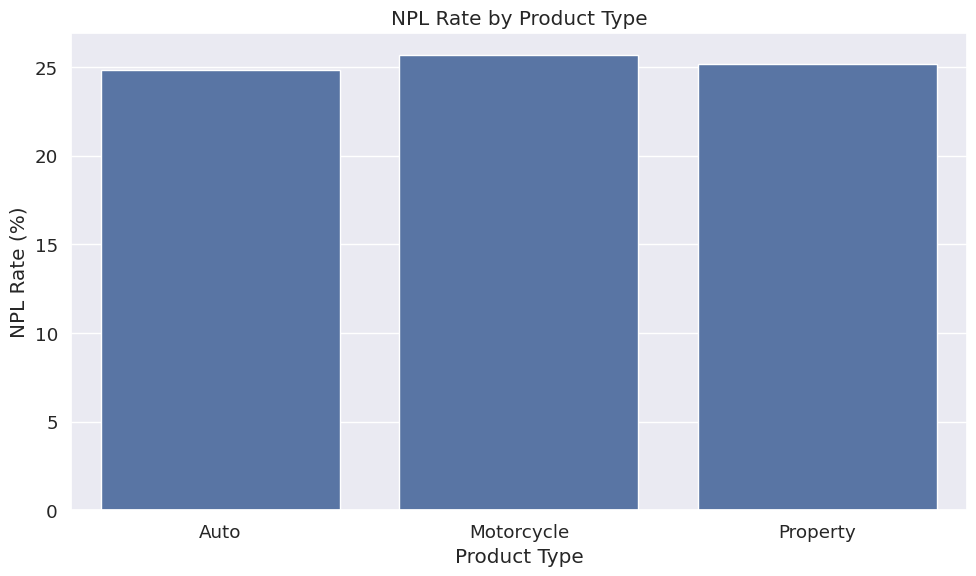

In [20]:
# Plot NPL Rate by Product Type
plt.figure(figsize=(10, 6))
sns.barplot(x=npl_by_product.index, y=npl_by_product.values)
plt.title('NPL Rate by Product Type')
plt.ylabel('NPL Rate (%)')
plt.xlabel('Product Type')
plt.tight_layout()
plt.savefig('../figures/npl_rate_by_product.png')
plt.show()

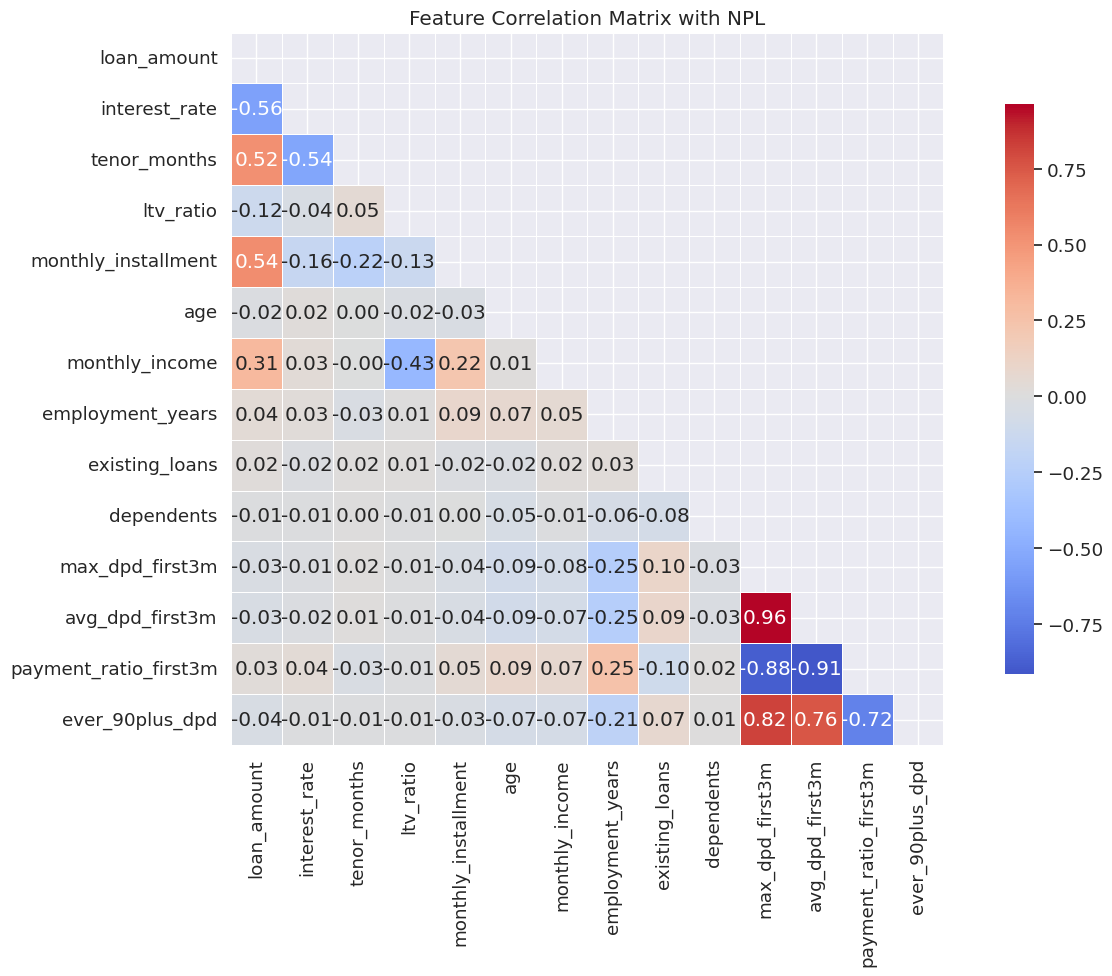

In [21]:
npl_corr_cols = ['loan_amount', 'interest_rate', 'tenor_months', 'ltv_ratio', 
                 'monthly_installment', 'age', 'monthly_income', 'employment_years',
                 'existing_loans', 'dependents', 'max_dpd_first3m', 'avg_dpd_first3m',
                 'payment_ratio_first3m', 'ever_90plus_dpd']
    
plt.figure(figsize=(14, 10))
correlation = full_data[npl_corr_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Feature Correlation Matrix with NPL')
plt.tight_layout()
plt.savefig('../figures/npl_correlation_matrix.png')
plt.show()

In [22]:
# Plot NPL rate by DPD in first 3 months
plt.figure(figsize=(12, 6))

# Create DPD buckets
full_data['dpd_bucket'] = pd.cut(
    full_data['max_dpd_first3m'], 
    bins=[0, 0, 30, 60, float('inf')],
    labels=['0', '1-30', '31-60', '60+']
)

dpd_npl_rate = full_data.groupby('dpd_bucket')['ever_90plus_dpd'].mean() * 100
sns.barplot(x=dpd_npl_rate.index, y=dpd_npl_rate.values)
plt.title('NPL Rate by Maximum DPD in First 3 Months')
plt.ylabel('NPL Rate (%)')
plt.xlabel('Maximum DPD in First 3 Months')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('../figures/npl_rate_by_dpd.png')
plt.show()

ValueError: Bin edges must be unique: Index([0.0, 0.0, 30.0, 60.0, inf], dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

<Figure size 1200x600 with 0 Axes>